# House pricing analysis

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. It was taken from [Kaggle](https://www.kaggle.com/harlfoxem/housesalesprediction?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-wwwcourseraorg-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01).


| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


## **Import the required libraries**


In [10]:
# In this section it needs to be decided  whether downloading data and running on Jupyter Lab (local)/Lite(web)
ThisNotebookIsInYourPC=False
DownloadLibs=True
Running_Jupyter_LITE=False
if DownloadLibs == True:
    print('Downloading')
    if Running_Jupyter_LITE == False:
        print('Downloading with pip')
        !pip install kagglehub huggingface_hub ipython-sql scipy
        print('Done')
    elif Running_Jupyter_LITE ==True:
        print('Downloading with piplite')
        softs=["scikit-learn","seaborn","scipy"]
        import piplite
        for s in softs:
            await piplite.install(s)
            print(s, 'installed')
        print('Done')

else:
    print('Libraries already downloaded')

Downloading
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.3 MB/s eta 0:00:00
Done


In [11]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from scipy.stats import pearsonr
warnings.filterwarnings('ignore')
%matplotlib inline


## Importing Data Sets


In [12]:
if Running_Jupyter_LITE==True:
    from pyodide.http import pyfetch
    async def download(url, filename):
        response = await pyfetch(url)
        if response.status == 200:
            with open(filename, "wb") as f:
                f.write(await response.bytes())
    filepath='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
    await download(filepath, "housing.csv")
    file="housing.csv"
    df = pd.read_csv(file)
else:
    file_path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
    df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [13]:
# Drop the unnecessary columns
df.drop(["id","Unnamed: 0"],axis=1,inplace=True);
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21600 non-null  float64
 3   bathrooms      21603 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

### Since we have more than 99% of data without NaNs, we can replace the ~1% null data in bedrooms and bathrooms with their respective mean.

In [14]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

## Exploratory Data Analysis


### Now we can observe the descriptive statistics for every column in the dataet

In [15]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926378,0.768818,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## We can try to answer the question: What features affect the most when pricing a house?
We can try to answer it by evaluating the relationship within the attributes listed:
* A fair procedure would be by observing the correlation coefficient among attributes

In [16]:
# Define a function to obtain pearson coefficients and their significance
def corrcoef(dframe):

    fmatrix = dframe.values
    rows, cols = fmatrix.shape

    r = np.ones((cols, cols), dtype=float)
    p = np.ones((cols, cols), dtype=float)

    for i in range(cols):
        for j in range(cols):
            if i == j:
                r_, p_ = np.nan,np.nan
            else:
                r_, p_ = pearsonr(fmatrix[:,i], fmatrix[:,j])

            r[j][i] = r_
            p[j][i] = p_

    return r, p

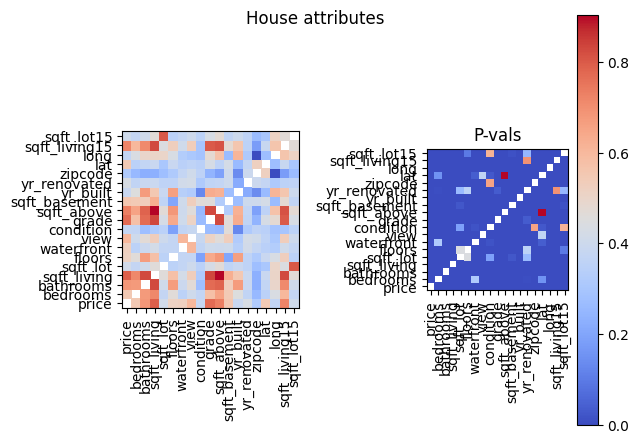

In [17]:
# We need to select only numerical
numeric_df = df.select_dtypes(include=['float64', 'int64'])
fix, axs = plt.subplots(1,2)
# First, we obtain the correlation between variables.
corres,ps=corrcoef(numeric_df)
#Plotting the corelation coefficients
ix=0
mat=axs[ix].pcolor(corres, cmap='coolwarm')
cols=list(numeric_df.columns)
axs[ix].set_xticks(list(np.arange(0.5,len(cols)+.5,1)))
axs[ix].set_xticklabels(cols,rotation=90)
axs[ix].set_yticks(list(np.arange(.5,len(cols)+.5,1)))
axs[ix].set_yticklabels(cols)
axs[ix].set_aspect('equal', 'box')
plt.title('Correlation coefficients')
#fix.tight_layout()
#plt.show()

## Plots p-vals
ix=1
mat=axs[ix].pcolor(ps, cmap='coolwarm')
cols=list(numeric_df.columns)
axs[ix].set_xticks(list(np.arange(0.5,len(cols)+.5,1)))
plt.xticks(rotation=90)
axs[ix].set_xticklabels(cols)
axs[ix].set_yticks(list(np.arange(.5,len(cols)+.5,1)))
axs[ix].set_yticklabels(cols)
axs[ix].set_aspect('equal', 'box')
plt.title('P-vals')
fix.colorbar(mat)
fix.tight_layout()
plt.suptitle('House attributes')
plt.show();



### We can identify the attributes that impact the price based on significant correlations

In [18]:
#forcor=numeric_df.corr()
corres=pd.DataFrame(corres)
ps=pd.DataFrame(ps)
corres.columns=numeric_df.columns
ps.columns=numeric_df.columns
forcor=corres.head(1)
styled_df = forcor[forcor<1].head(1)
styled_df.reset_index(drop=True, inplace=True)
heads=styled_df.columns


cols=styled_df.columns[styled_df.isna().any()].tolist()
styled_df.drop(cols,axis=1,inplace=True)
pes=ps.head(1)
pes.drop(cols,axis=1,inplace=True)
row=styled_df.iloc[0].values
cols=np.argsort(row)
vals=styled_df.iloc[0,cols]
vals=vals[::-1].to_frame()
vals=vals.transpose()
pes=pes.iloc[0,cols]
pes=pes[::-1].to_frame()
pes=pes.transpose()
heads=vals.columns

In [19]:
print('R\N{superscript two} values:')
vals

R² values:


,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,sqft_basement,bedrooms,lat,waterfront,floors,yr_renovated,sqft_lot,sqft_lot15,yr_built,condition,long,zipcode
0,0.702035,0.667434,0.605567,0.585379,0.525738,0.397293,0.323816,0.308797,0.307003,0.266369,0.256794,0.126434,0.089661,0.082447,0.054012,0.036362,0.021626,-0.053203


In [20]:
print('P values:')
pes.columns=heads
pes

P values:


,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,sqft_basement,bedrooms,lat,waterfront,floors,yr_renovated,sqft_lot,sqft_lot15,yr_built,condition,long,zipcode
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.581010e-322,1.021348e-77,7.972505e-40,6.417560e-34,1.929873e-15,8.935654e-08,0.001475,5.011051e-15


### We can explain the price in relationship with the number of attributes used

In [21]:
lr=LinearRegression()
fit_coeffs=[]
pred_coeffs=[]
withoutPrice=numeric_df.drop('price',axis=1)
Y=numeric_df['price']
for index,header in enumerate(heads):
    X=withoutPrice[heads[0:index+1]]
    lr.fit(X,Y)
    r2tr=lr.score(X,Y)
    yhat=lr.predict(X)
    r2ts=pearsonr(yhat,Y)
    fit_coeffs.append(r2tr)
    pred_coeffs.append(r2ts[0])


### And we can see that the price can be explained as we increase the number of attributes.

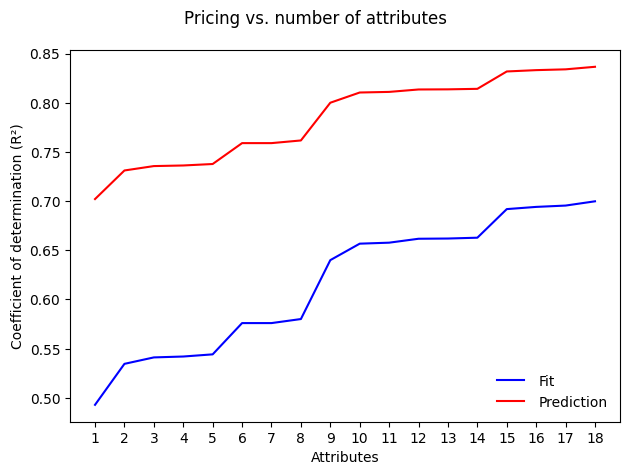

In [22]:
fig, axs=plt.subplots()
axis=np.arange(0,len(fit_coeffs),1)+1
plt.plot(axis,fit_coeffs,'b',label='Fit')
plt.plot(axis,pred_coeffs,'r',label='Prediction')
plt.xticks(axis)
plt.legend();
sns.move_legend(
    axs, loc="lower right", ncol=1, frameon=False, columnspacing=1, handletextpad=1,
)
plt.xlabel('Attributes')
plt.ylabel('Coefficient of determination (R\N{superscript two})')
plt.suptitle('Pricing vs. number of attributes')
plt.tight_layout()
plt.show()

### But given their high correlation, we can see that even the Square footage of the home can be a good predictor of the price

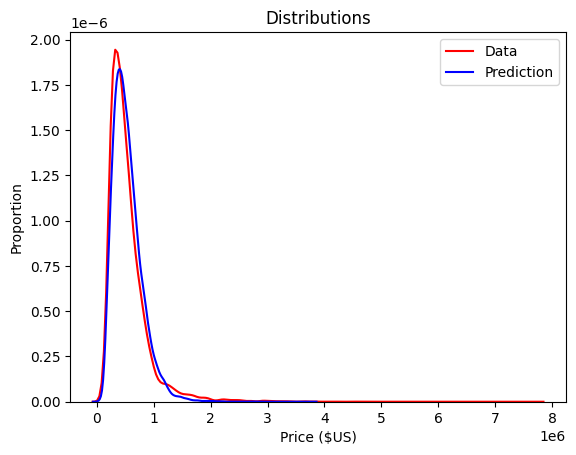

In [23]:
X=withoutPrice[heads[0:1]]
lr.fit(X,Y)
r2tr=lr.score(X,Y)
yhat=lr.predict(X)
r2ts=pearsonr(yhat,Y)
fit_coeffs.append(r2tr)
pred_coeffs.append(r2ts[0])

plt.figure()

ax1 = sns.kdeplot(Y, color="r", label='Data')
ax2 = sns.kdeplot(yhat, color="b", label='Prediction', ax=ax1)

plt.title('Distributions')
plt.xlabel('Price ($US)')
plt.ylabel('Proportion')
plt.legend()
plt.show()
plt.close()

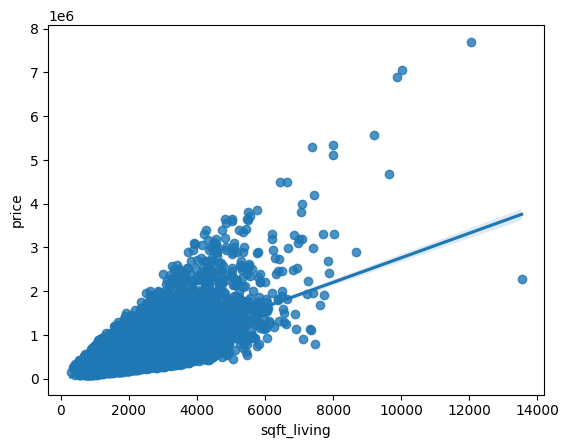

In [24]:
sns.regplot(x=y,y=yhat)
plt.show()